In [1]:
import src.data_acquisition as da

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

In [4]:
pool_data=pd.read_csv('../data/pool_data.csv',parse_dates=['date'])

In [5]:
pool_data

,date,tvlUSD,volumeUSD,feesUSD,pool_id,pool_name
0,2021-05-24,403892.931715,1.560326e+05,78.016302,0x00cef0386ed94d738c8f8a74e8bfd0376926d24c,BUSD_USDC_05
1,2021-05-25,627333.528404,1.641681e+06,820.840475,0x00cef0386ed94d738c8f8a74e8bfd0376926d24c,BUSD_USDC_05
2,2021-05-26,641104.310366,1.581438e+05,79.071880,0x00cef0386ed94d738c8f8a74e8bfd0376926d24c,BUSD_USDC_05
3,2021-05-27,641137.824278,6.312746e+04,31.563732,0x00cef0386ed94d738c8f8a74e8bfd0376926d24c,BUSD_USDC_05
4,2021-05-28,522950.055411,3.004094e+05,150.204708,0x00cef0386ed94d738c8f8a74e8bfd0376926d24c,BUSD_USDC_05
...,...,...,...,...,...,...
3828,2022-10-21,332852.727774,2.582470e+04,12.912351,0xd5ad5ec825cac700d7deafe3102dc2b6da6d195d,BUSD_USDT_05
3829,2022-10-22,332868.272886,1.235443e+04,6.177214,0xd5ad5ec825cac700d7deafe3102dc2b6da6d195d,BUSD_USDT_05
3830,2022-10-23,332885.856963,2.821563e+04,14.107815,0xd5ad5ec825cac700d7deafe3102dc2b6da6d195d,BUSD_USDT_05
3831,2022-10-24,332908.083203,4.801312e+04,24.006560,0xd5ad5ec825cac700d7deafe3102dc2b6da6d195d,BUSD_USDT_05


In [6]:
pool_data.groupby('pool_name').size()

pool_name
BUSD_USDC_01    213
BUSD_USDC_05    506
BUSD_USDT_05    536
DAI_USDC_01     347
DAI_USDC_05     540
DAI_USDT_01     104
DAI_USDT_05     540
USDC_USDC_01    160
USDC_USDT_01    347
USDC_USDT_05    540
dtype: int64

In [7]:
volume_df=pool_data.groupby('date').volumeUSD.sum().to_frame().reset_index()

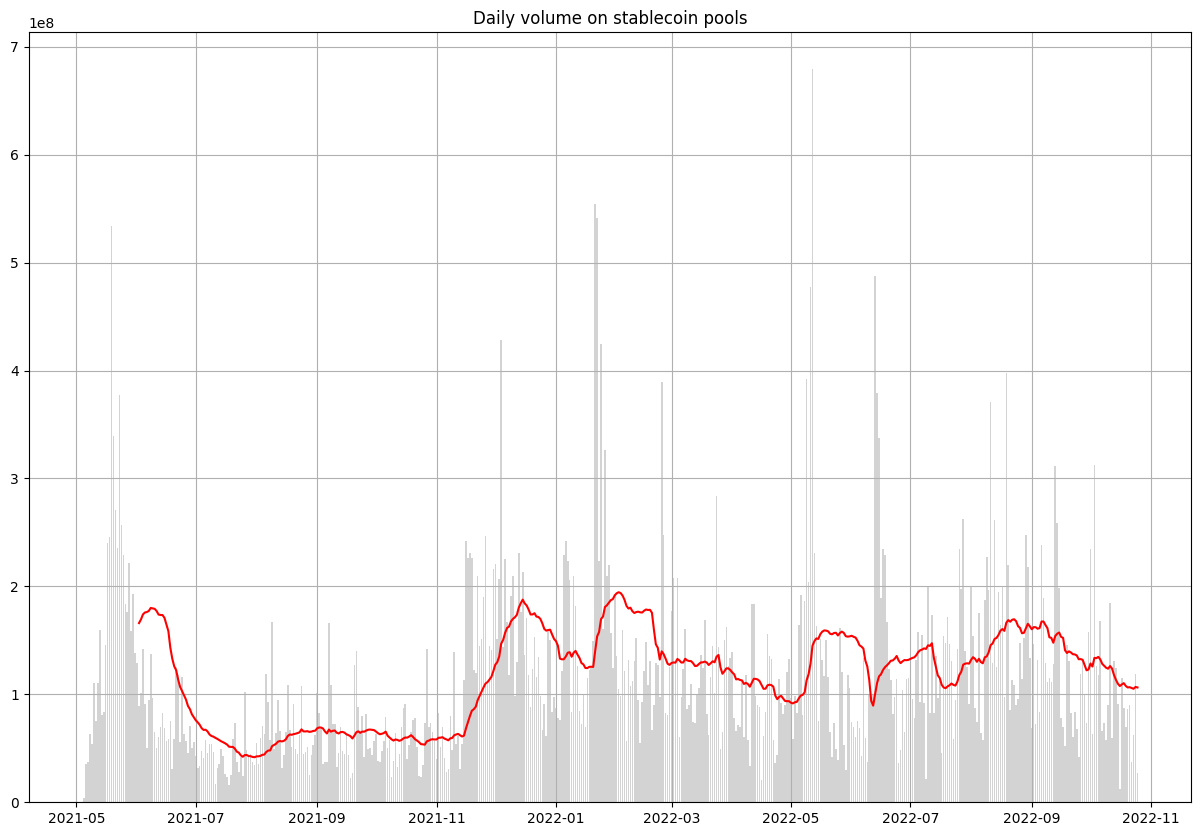

In [8]:
plt.bar(volume_df.date,volume_df.volumeUSD,color='lightgrey')
plt.plot(volume_df.date,volume_df.volumeUSD.rolling(30).mean(),color='red')
plt.grid()
_=plt.title('Daily volume on stablecoin pools')

In [9]:
start_dates=pool_data.groupby('pool_name').date.min().to_frame().reset_index()
start_dates

,pool_name,date
0,BUSD_USDC_01,2021-12-15
1,BUSD_USDC_05,2021-05-24
2,BUSD_USDT_05,2021-05-06
3,DAI_USDC_01,2021-11-13
4,DAI_USDC_05,2021-05-04
5,DAI_USDT_01,2022-07-14
6,DAI_USDT_05,2021-05-04
7,USDC_USDC_01,2021-11-18
8,USDC_USDT_01,2021-11-13
9,USDC_USDT_05,2021-05-04


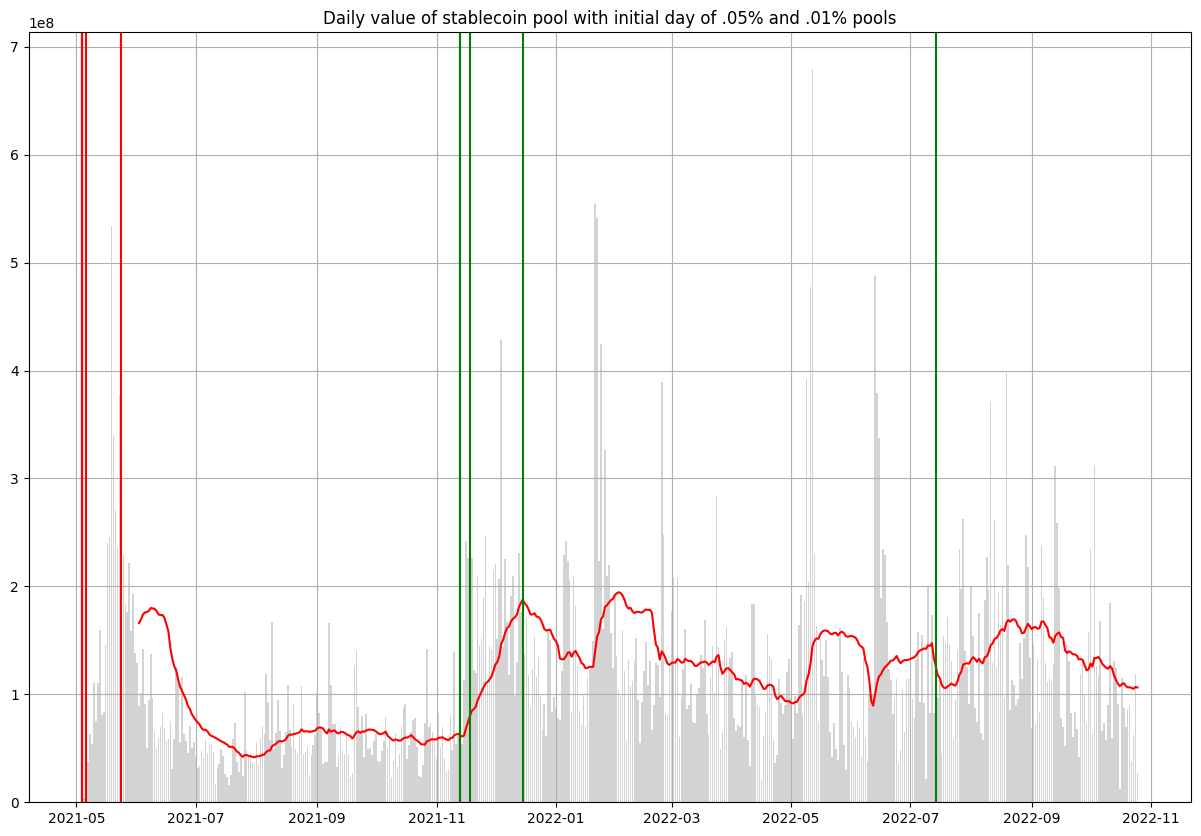

In [10]:
plt.bar(volume_df.date,volume_df.volumeUSD,color='lightgrey')
plt.plot(volume_df.date,volume_df.volumeUSD.rolling(30).mean(),color='red')

for index,row in start_dates.iterrows():
    plt.axvline(row.date,color='green' if '01' in row.pool_name else 'red')

plt.grid()
_=plt.title('Daily value of stablecoin pool with initial day of .05% and .01% pools')

In [11]:
min_tvl=10000000
big_pool_names=pool_data[(pool_data.date==pool_data.date.max()) & (pool_data.tvlUSD>=min_tvl)].pool_name
big_pools=pool_data[pool_data.pool_name.isin(big_pool_names)].reset_index()
big_pools

,index,date,tvlUSD,volumeUSD,feesUSD,pool_id,pool_name
0,0,2021-05-24,4.038929e+05,1.560326e+05,78.016302,0x00cef0386ed94d738c8f8a74e8bfd0376926d24c,BUSD_USDC_05
1,1,2021-05-25,6.273335e+05,1.641681e+06,820.840475,0x00cef0386ed94d738c8f8a74e8bfd0376926d24c,BUSD_USDC_05
2,2,2021-05-26,6.411043e+05,1.581438e+05,79.071880,0x00cef0386ed94d738c8f8a74e8bfd0376926d24c,BUSD_USDC_05
3,3,2021-05-27,6.411378e+05,6.312746e+04,31.563732,0x00cef0386ed94d738c8f8a74e8bfd0376926d24c,BUSD_USDC_05
4,4,2021-05-28,5.229501e+05,3.004094e+05,150.204708,0x00cef0386ed94d738c8f8a74e8bfd0376926d24c,BUSD_USDC_05
...,...,...,...,...,...,...,...
2275,3132,2022-10-21,2.467383e+07,2.299657e+06,1149.828502,0x7858e59e0c01ea06df3af3d20ac7b0003275d4bf,USDC_USDT_05
2276,3133,2022-10-22,2.493749e+07,8.260988e+05,413.049380,0x7858e59e0c01ea06df3af3d20ac7b0003275d4bf,USDC_USDT_05
2277,3134,2022-10-23,3.372380e+07,2.216237e+06,1108.118424,0x7858e59e0c01ea06df3af3d20ac7b0003275d4bf,USDC_USDT_05
2278,3135,2022-10-24,2.618394e+07,2.538254e+06,1269.126821,0x7858e59e0c01ea06df3af3d20ac7b0003275d4bf,USDC_USDT_05


Daily volume for major stablecoin pools (>$10m TVL)


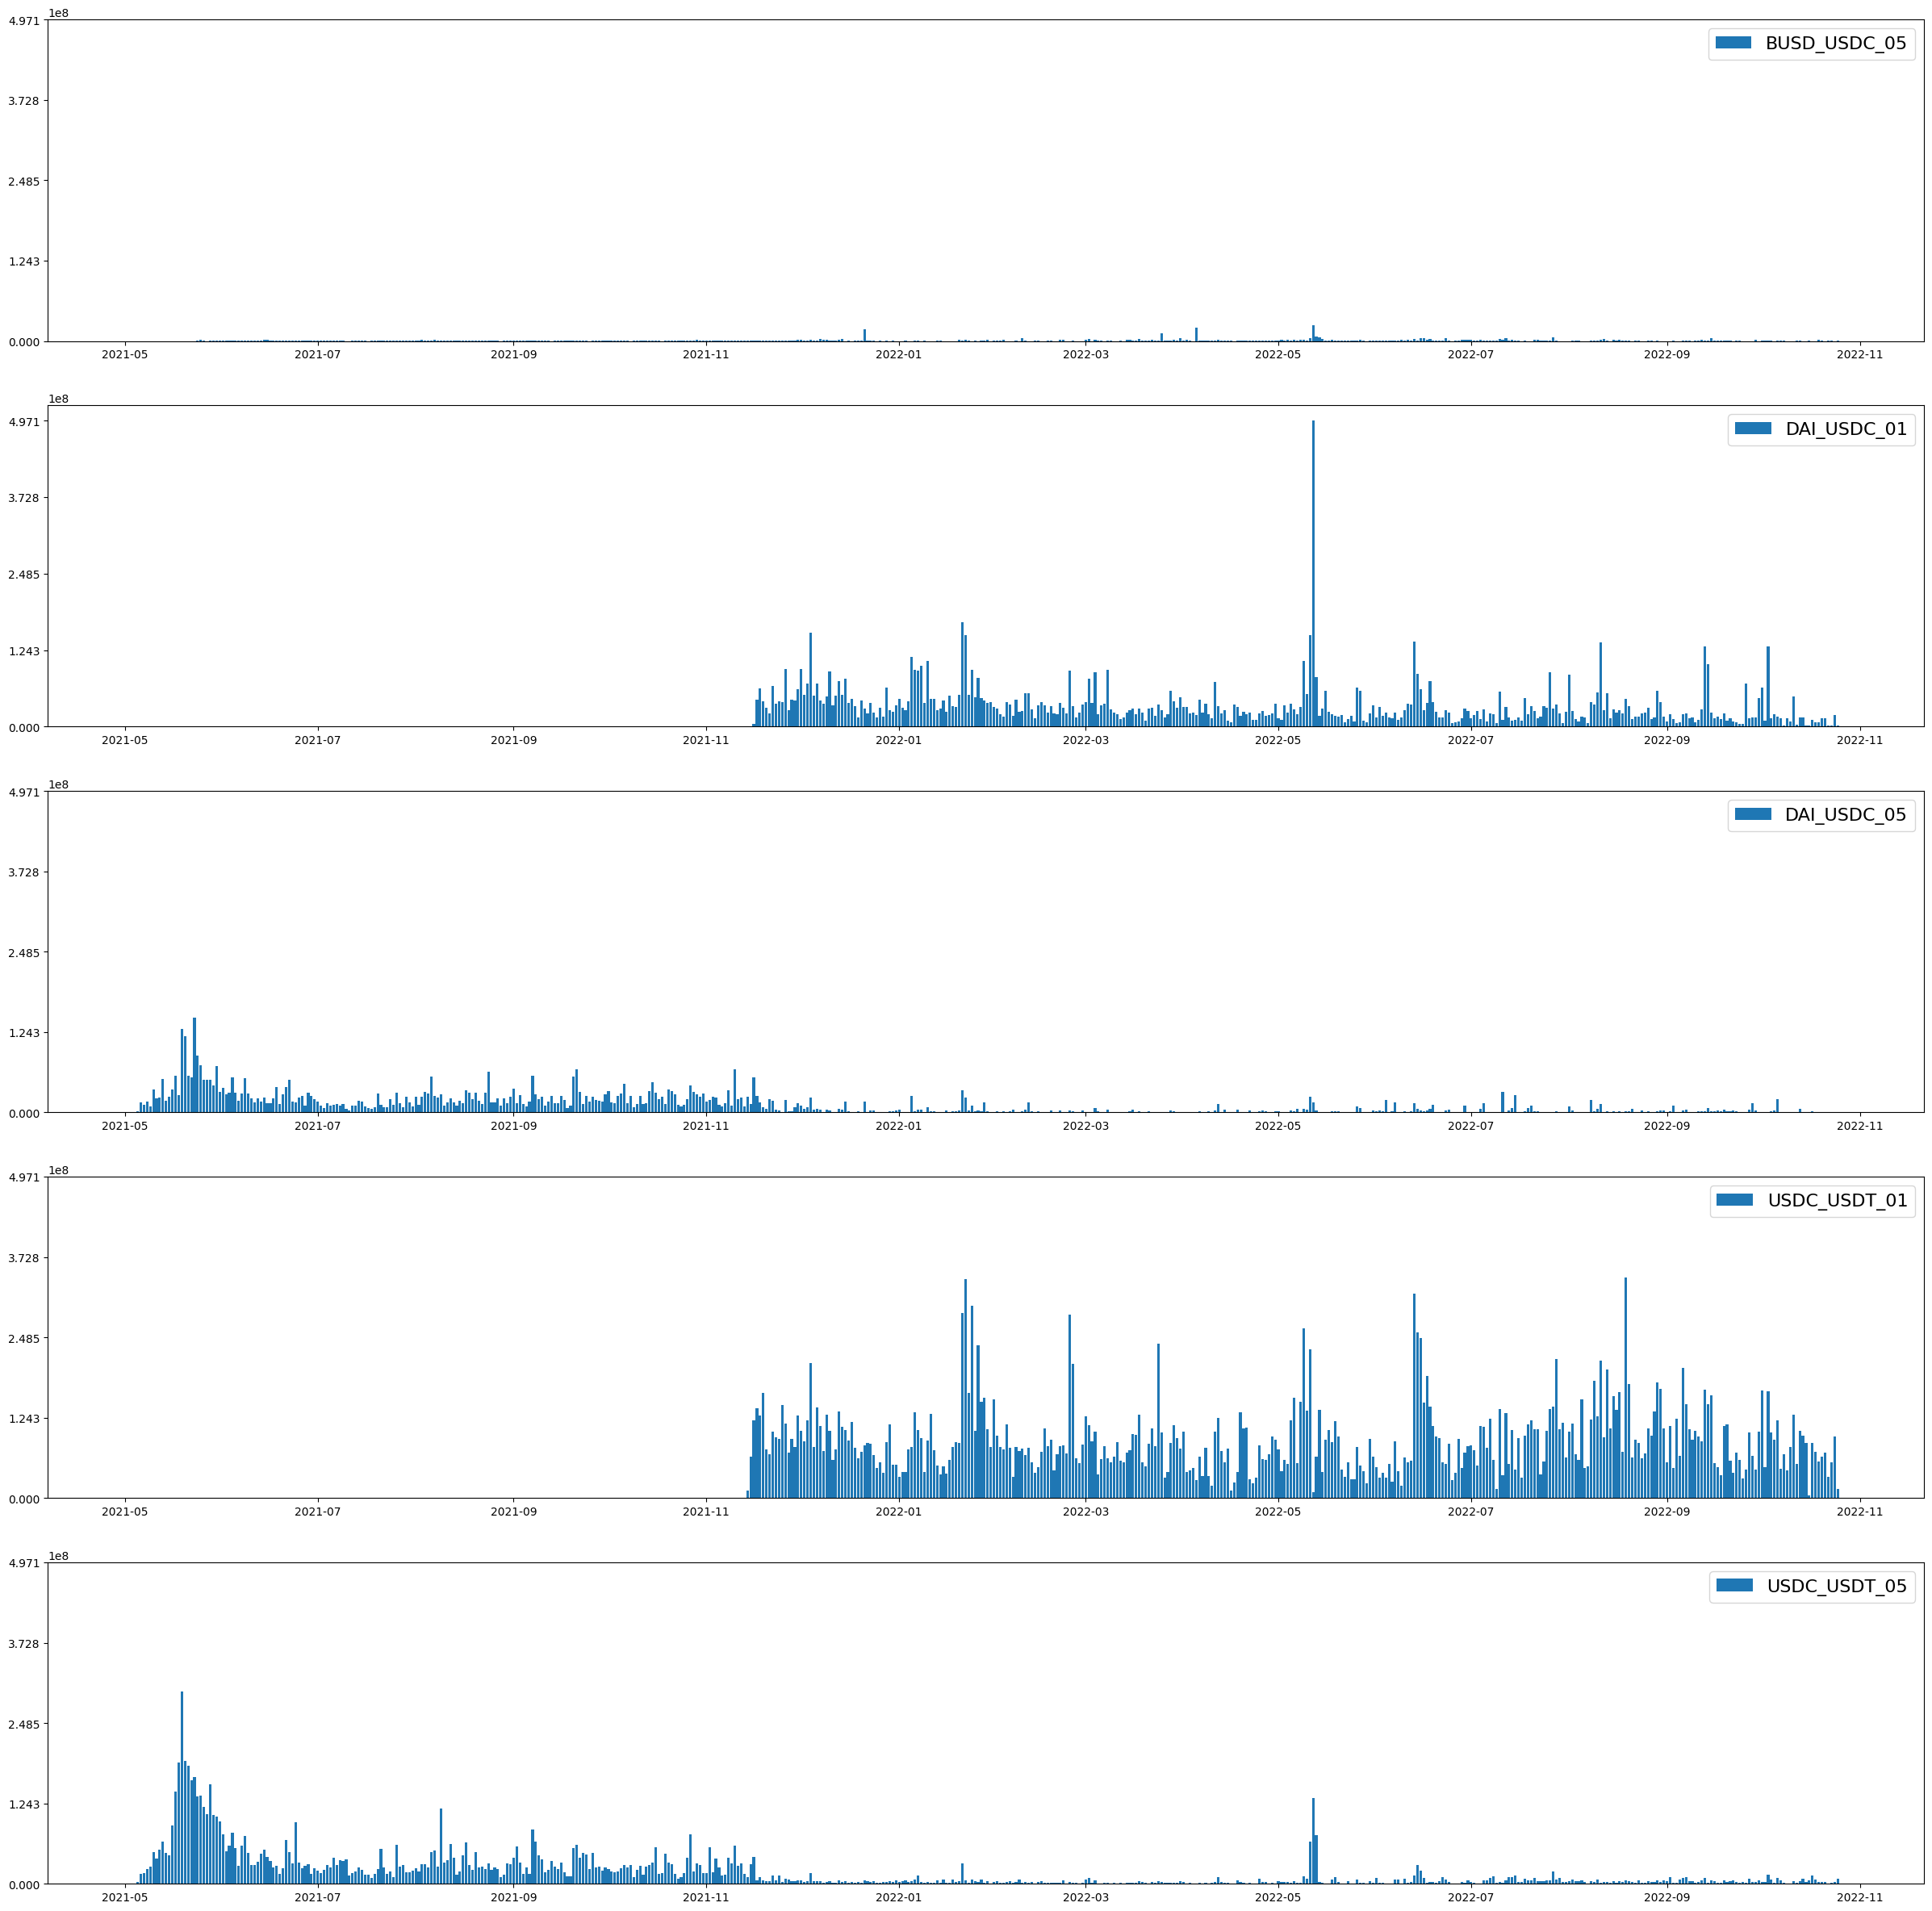

In [12]:
fig,plots=plt.subplots(len(big_pools.pool_name.unique()),figsize=(30,30))

date_range=pd.date_range(big_pools.date.min(),big_pools.date.max())
dr_df=pd.DataFrame(date_range)
dr_df.columns=['date']

plot_y=np.linspace(0,big_pools.volumeUSD.max(),5)

for i,(pool_name,frame) in enumerate(big_pools.groupby('pool_name')):
    merged=dr_df.merge(frame[['date','volumeUSD']],on='date',how='outer')
    merged['volumeUSD']=np.where(merged.volumeUSD.isna(),0,merged.volumeUSD)
    plots[i].bar(merged.date,merged.volumeUSD,label=pool_name)
    plots[i].legend(fontsize=16)
    plots[i].set_yticks(plot_y)

print('Daily volume for major stablecoin pools (>$10m TVL)')

In [13]:
start_date=big_pools.groupby('pool_name').date.min().max()
start_date

Timestamp('2021-11-13 00:00:00')

In [14]:
big_pools['returns']=big_pools.feesUSD/big_pools.tvlUSD

In [15]:
current_env=big_pools[big_pools.date>=start_date].copy()

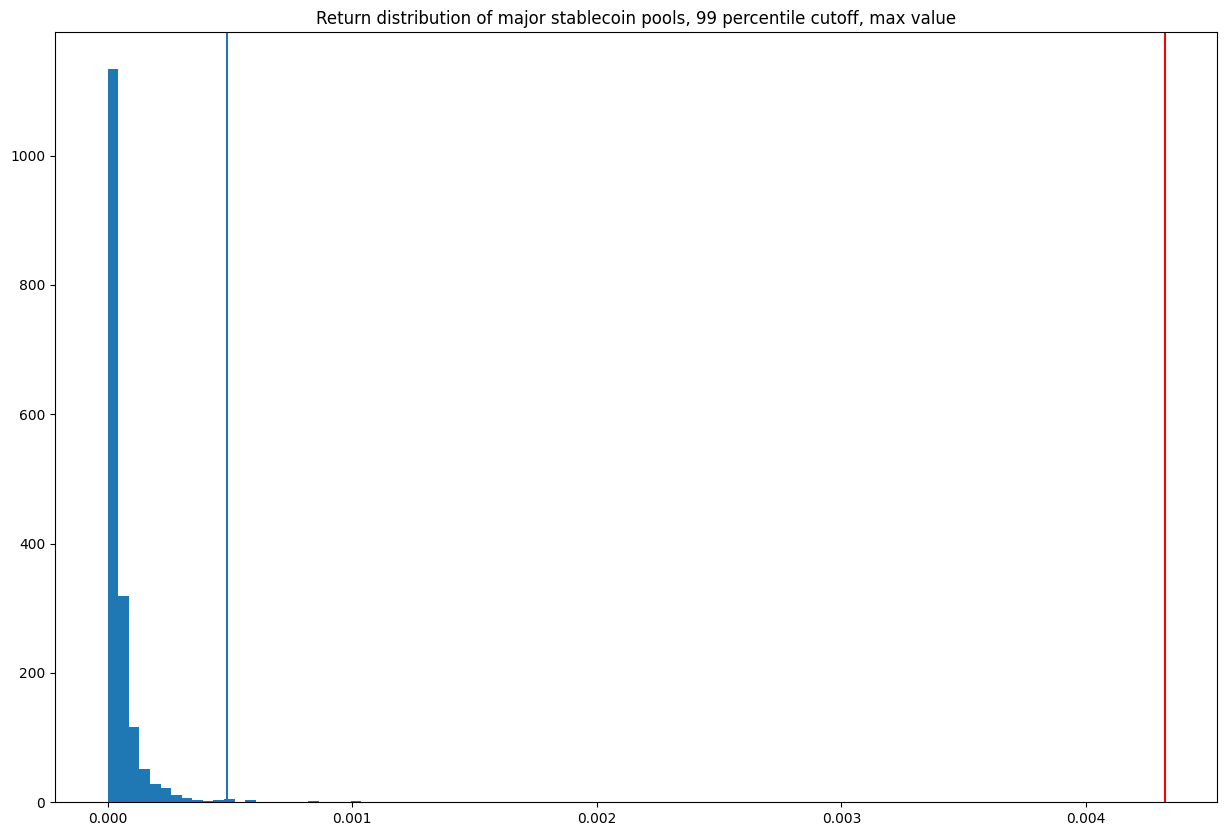

In [16]:
cutoff_percentage=.99
cutoff_return=current_env.sort_values('returns',ascending=True).iloc[int(cutoff_percentage*len(current_env))].returns
plt.axvline(cutoff_return)
plt.axvline(current_env.returns.max(),color='red')
plt.hist(current_env.returns,bins=100)
_=plt.title('Return distribution of major stablecoin pools, 99 percentile cutoff, max value')

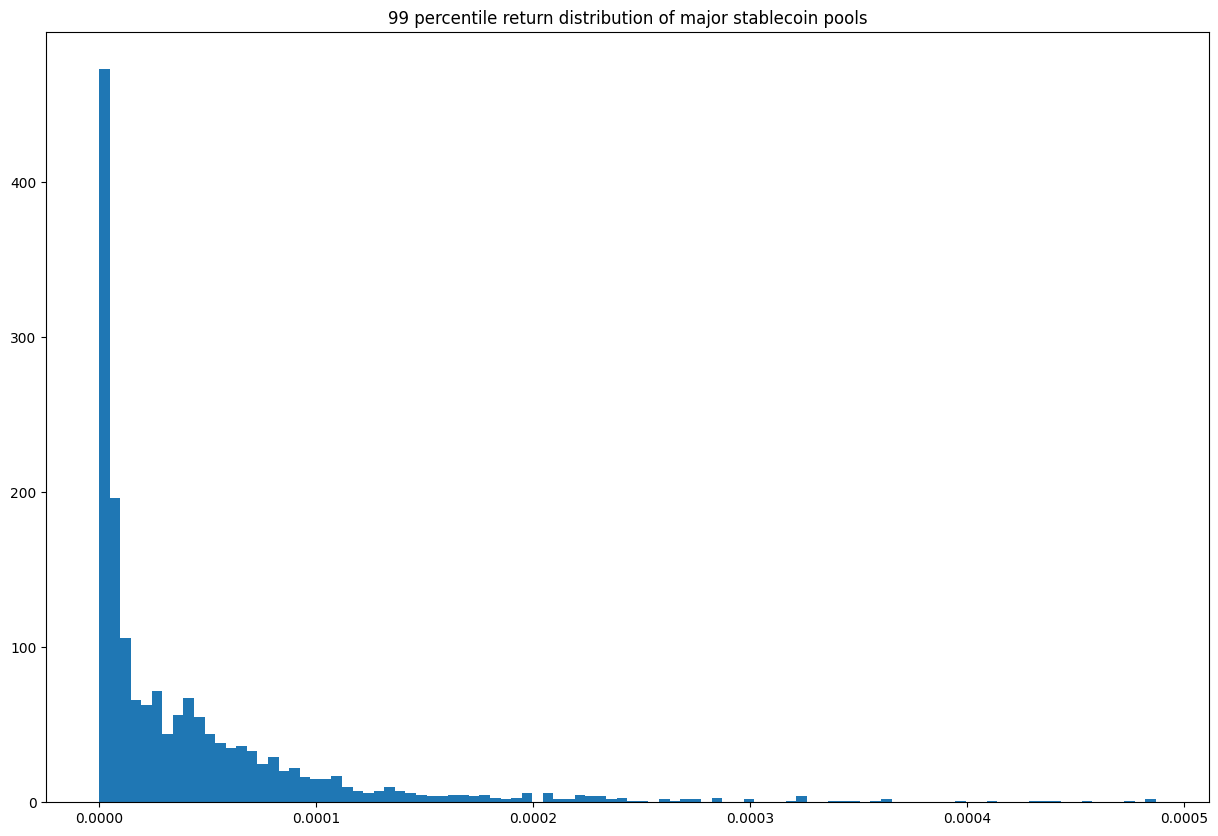

In [17]:
plt.hist(current_env[current_env.returns<=cutoff_return].returns,bins=100)
_=plt.title('99 percentile return distribution of major stablecoin pools')

Return distribution of each major stablecoin pool


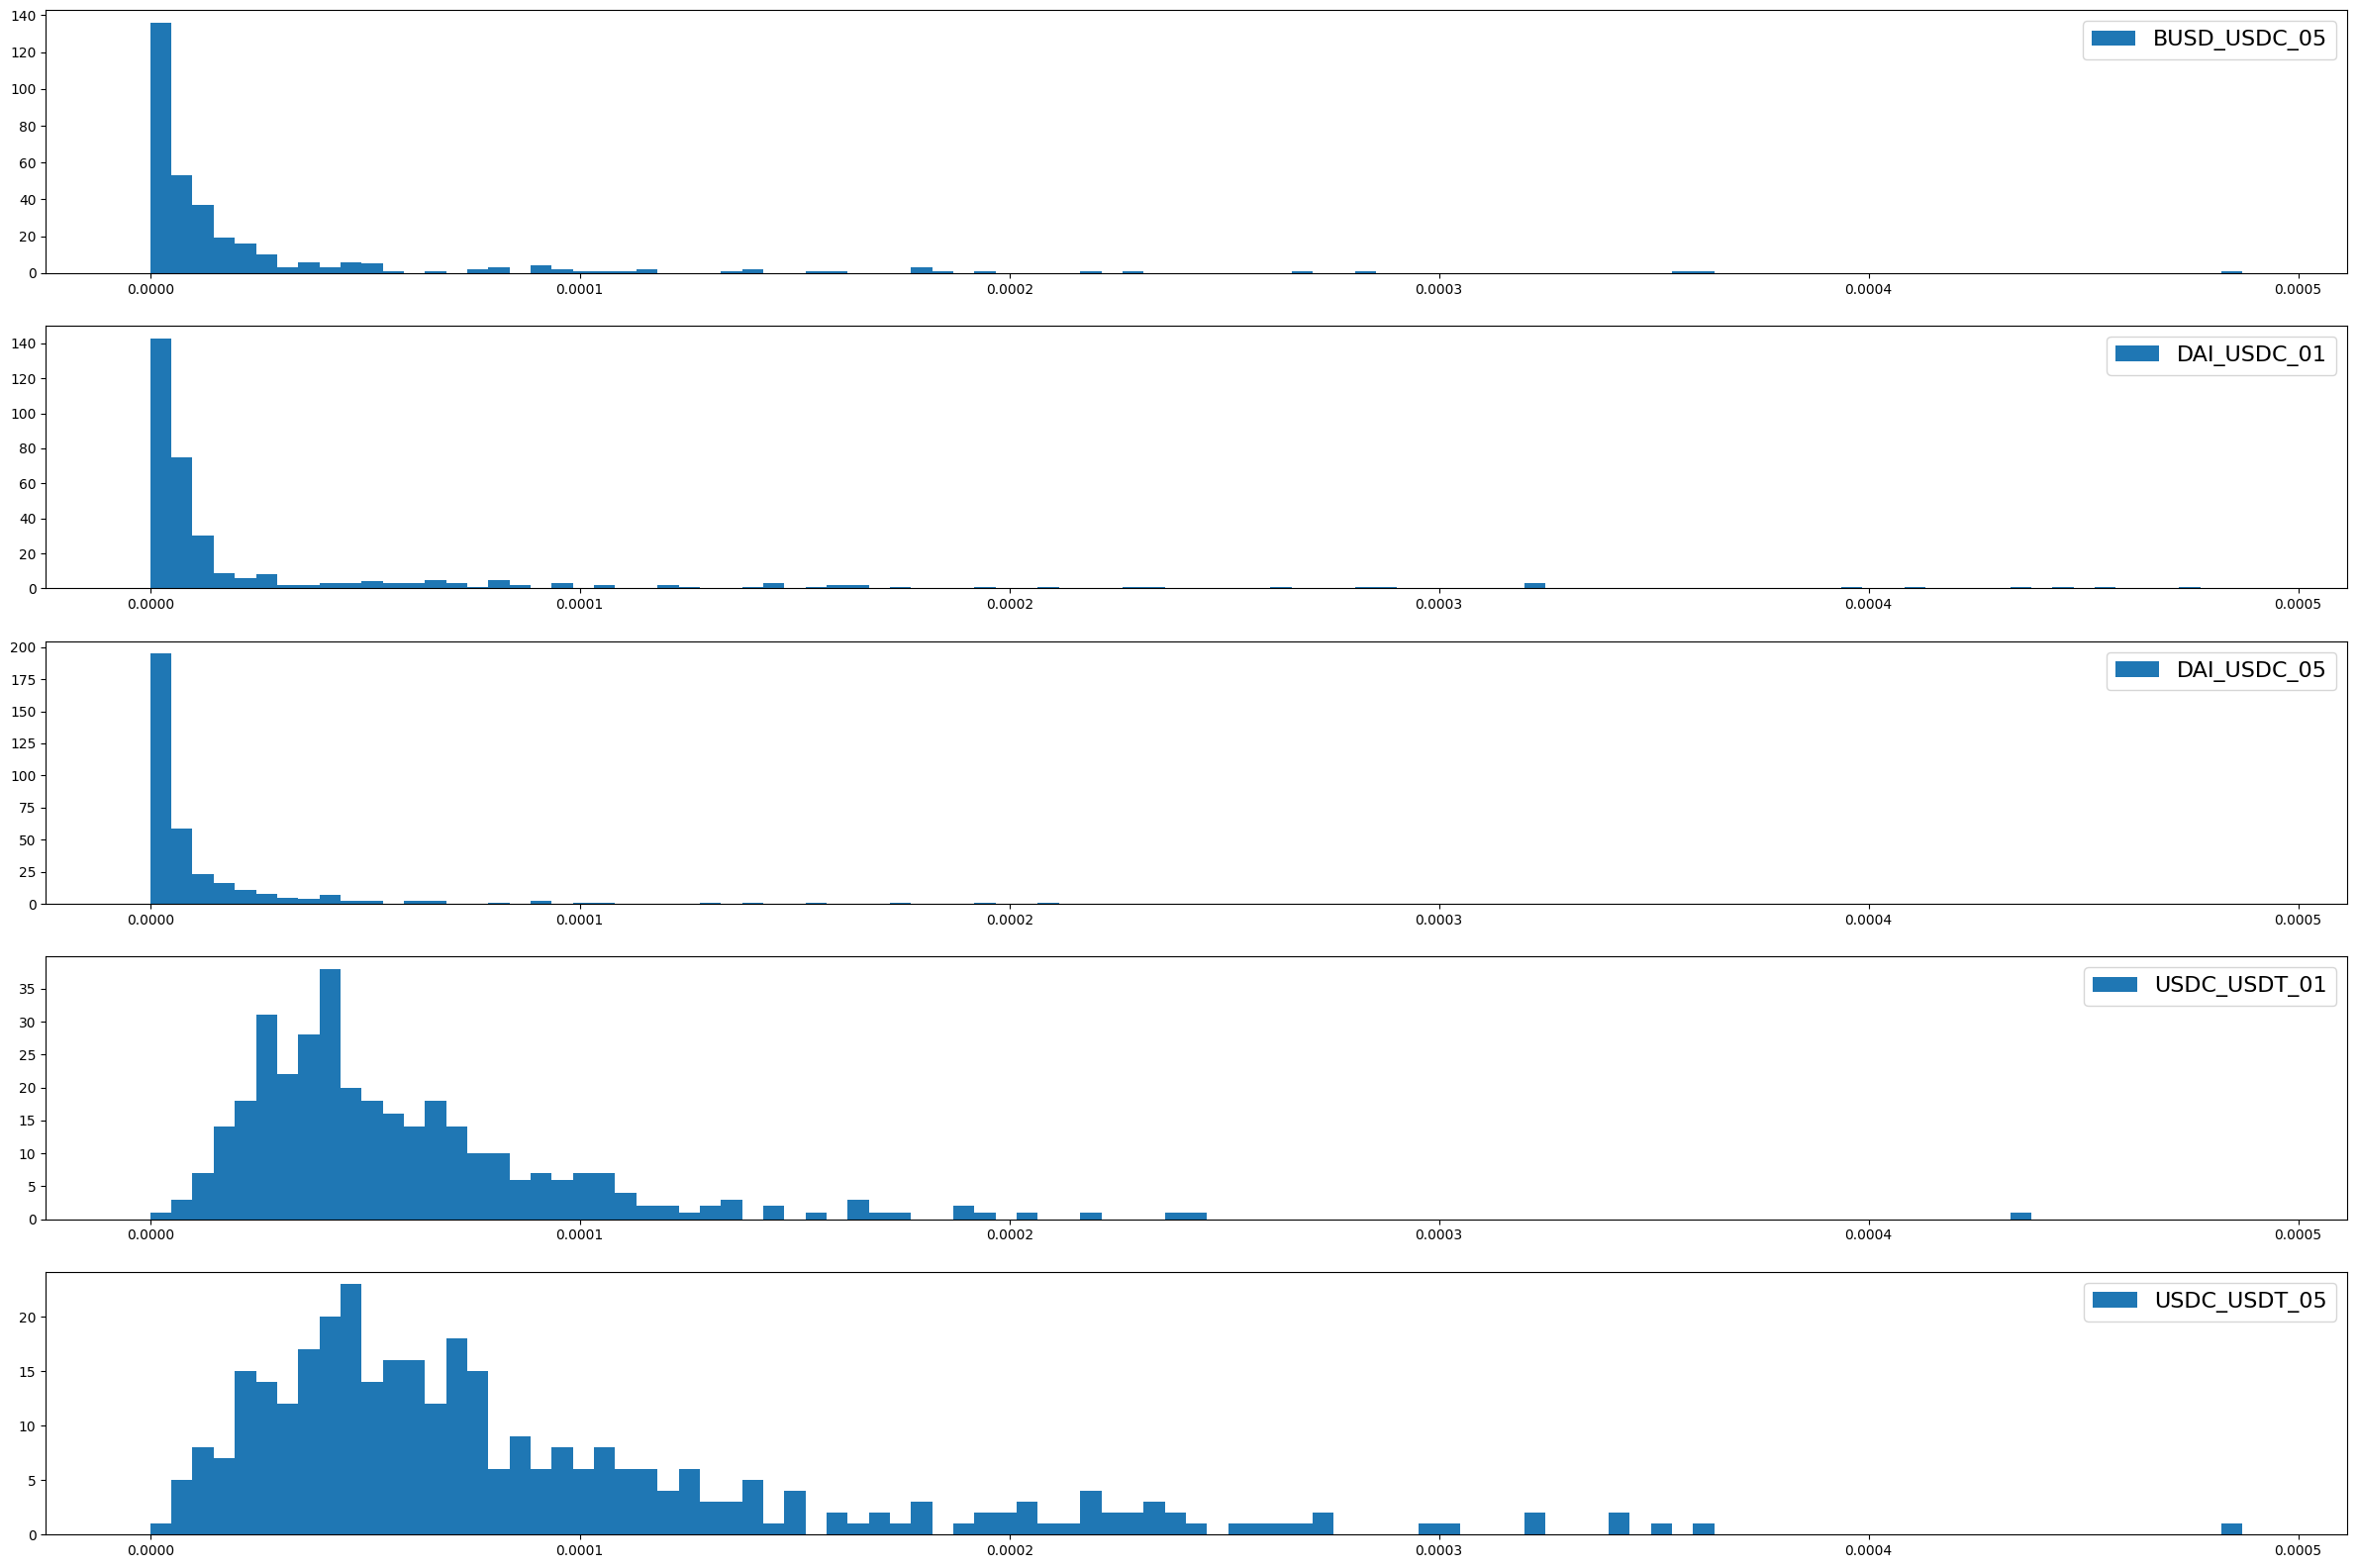

In [18]:
fig,plots=plt.subplots(len(big_pools.pool_name.unique()),figsize=(30,20))

for i,(pool_name,frame) in enumerate(current_env.groupby('pool_name')):
    plots[i].hist(frame[frame.returns<=cutoff_return].returns,bins=np.linspace(0,cutoff_return,num=100),label=pool_name)
    plots[i].legend(fontsize=16)
    
print('Return distribution of each major stablecoin pool')

Daily returns of major stablecoin pools. outliers trimmed.


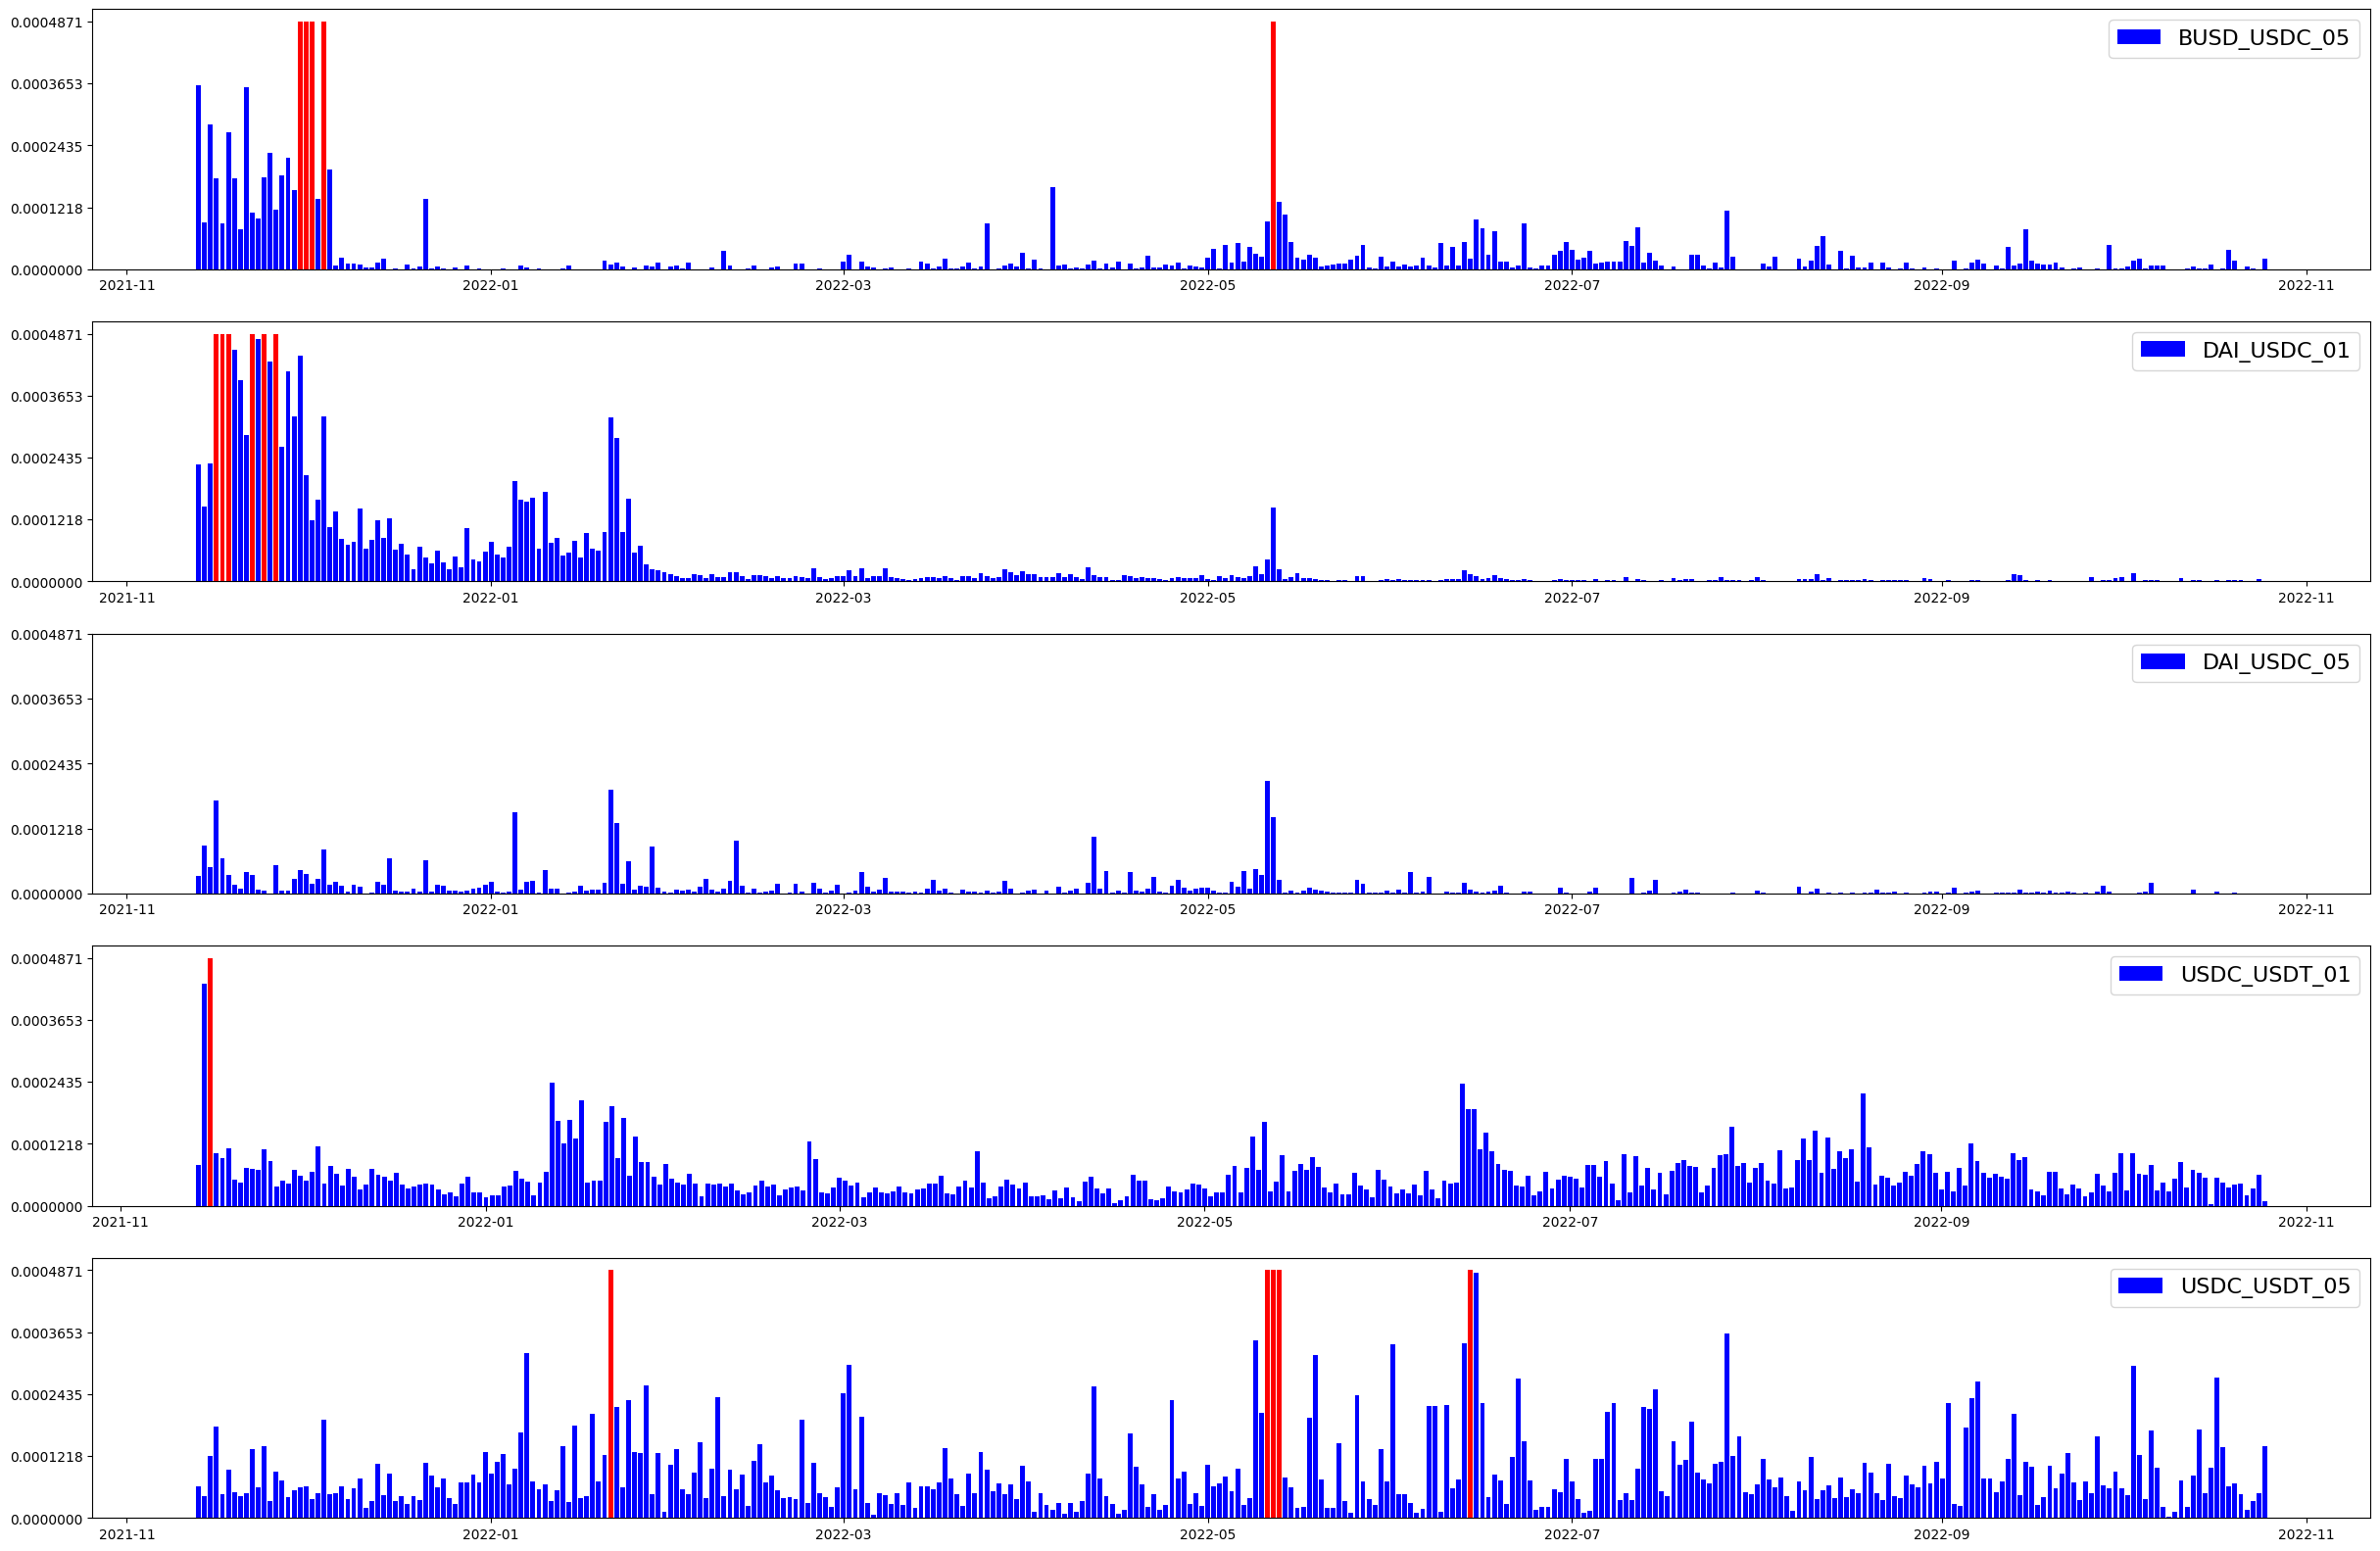

In [19]:
fig,plots=plt.subplots(len(big_pools.pool_name.unique()),figsize=(30,20))

plot_y=np.linspace(0,cutoff_return,5)

for i,(pool_name,frame) in enumerate(current_env.groupby('pool_name')):
    normal_returns=np.where(frame.returns<cutoff_return,frame.returns,float('nan'))
    outliers=np.where(frame.returns>=cutoff_return,cutoff_return,float('nan'))
    plots[i].bar(frame.date,normal_returns,color='blue',label=pool_name)
    plots[i].bar(frame.date,outliers,color='red')
    plots[i].set_yticks(plot_y)
    plots[i].legend(fontsize=16)
    
print('Daily returns of major stablecoin pools. outliers trimmed.')